In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('marketing_AB.csv')

In [3]:
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [4]:
df = df.drop(columns = 'Unnamed: 0')
df.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [51]:
df.columns = df.columns.str.replace(' ', '_')
df.head(10)

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour,group
0,1069124,ad,0,130,Monday,20,treatment
1,1119715,ad,0,93,Tuesday,22,treatment
2,1144181,ad,0,21,Tuesday,18,treatment
3,1435133,ad,0,355,Tuesday,10,treatment
4,1015700,ad,0,276,Friday,14,treatment
5,1137664,ad,0,734,Saturday,10,treatment
6,1116205,ad,0,264,Wednesday,13,treatment
7,1496843,ad,0,17,Sunday,18,treatment
8,1448851,ad,0,21,Tuesday,19,treatment
9,1446284,ad,0,142,Monday,14,treatment


In [7]:
df['user_id'].nunique()

588101

In [9]:
df['converted'].value_counts()

converted
False    573258
True      14843
Name: count, dtype: int64

In [10]:
df['converted'] = df['converted'].astype(int)

In [12]:
df['test_group'].value_counts()

test_group
ad     564577
psa     23524
Name: count, dtype: int64

In [15]:
df['group'] = df['test_group']

In [16]:
df['group'].replace(['ad', 'psa'], ['treatment', 'control'], inplace = True)

In [17]:
df.head()

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour,group
0,1069124,ad,0,130,Monday,20,treatment
1,1119715,ad,0,93,Tuesday,22,treatment
2,1144181,ad,0,21,Tuesday,18,treatment
3,1435133,ad,0,355,Tuesday,10,treatment
4,1015700,ad,0,276,Friday,14,treatment


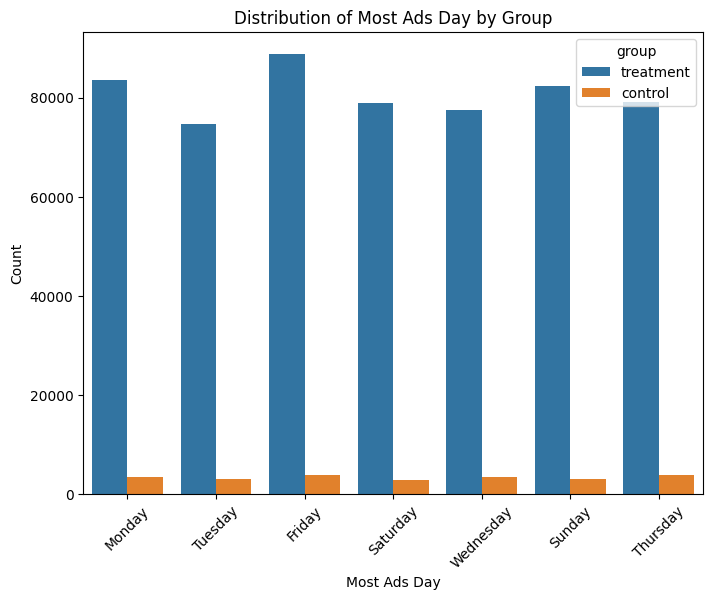

In [36]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='most_ads_day', hue='group')
plt.title('Distribution of Most Ads Day by Group')
plt.xlabel('Most Ads Day')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

In [38]:
df.groupby('test_group')['converted'].value_counts()

test_group  converted
ad          0            550154
            1             14423
psa         0             23104
            1               420
Name: count, dtype: int64

In [37]:
ad_experimental=df[df['test_group']=='ad']
psa_control=df[df['test_group']=='psa']

In [39]:
ad_converted=ad_experimental['converted'].mean()
psa_converted=psa_control['converted'].mean()

In [40]:
print(ad_converted,psa_converted)

0.025546559636683747 0.01785410644448223


<Axes: ylabel='Density'>

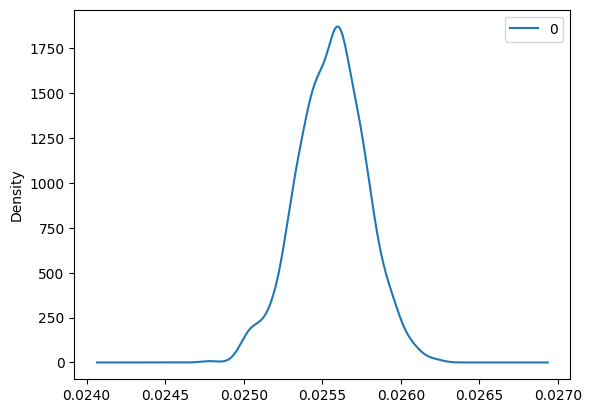

In [41]:
boot_ad=[]

#Set up a loop that will iterate 1000 times. In each iteration, a new bootstrapped sample will be generated
for i in range (1000):
    boot_mean=ad_experimental.sample(frac=1,replace=True)['converted'].mean()
    boot_ad.append(boot_mean)
    

boot_ad=pd.DataFrame(boot_ad)

#Create a density plot of the bootstrapped means
boot_ad.plot(kind='density')

<Axes: ylabel='Density'>

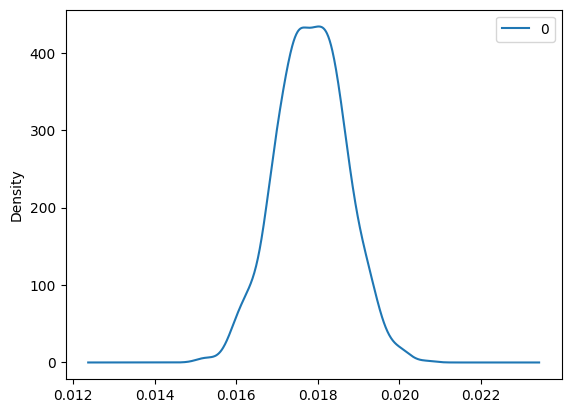

In [42]:
boot_psa=[]

for i in range(1000):
    boot_mean=psa_control.sample(frac=1,replace=True)['converted'].mean()
    boot_psa.append(boot_mean)
    
boot_psa=pd.DataFrame(boot_psa)
boot_psa.plot(kind='density')

In [46]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

In [48]:
from scipy.stats import shapiro, levene, mannwhitneyu, ttest_ind